In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gaussian_pulse(t, center, width, amplitude=1.0):
    """
    Generate a Gaussian pulse.
    
    Parameters:
    t (numpy array): Time array.
    center (float): Center of the Gaussian pulse.
    width (float): Standard deviation (spread or width) of the Gaussian pulse.
    amplitude (float): Amplitude of the Gaussian pulse.
    
    Returns:
    numpy array: Gaussian pulse values.
    """
    return amplitude * np.exp(-((t - center)**2) / (2 * width**2))


In [3]:
def pulse_train_no_overlap(t, centers, widths, amplitudes):
    """
    Generate a train of Gaussian pulses with arbitrary centers, widths, and amplitudes,
    ensuring no overlap.
    
    Parameters:
    t (numpy array): Time array.
    centers (list of floats): List of centers for each Gaussian pulse.
    widths (list of floats): List of widths for each Gaussian pulse.
    amplitudes (list of floats): List of amplitudes for each Gaussian pulse.
    
    Returns:
    numpy array: Pulse train values.
    """
    # Ensure no overlap by checking distances between centers
    min_distance_factor = 5  # Minimum distance factor to avoid overlap (3 times the width)
    for i in range(1, len(centers)):
        while centers[i] - centers[i-1] < min_distance_factor * max(widths[i], widths[i-1]):
            centers[i] += min_distance_factor * max(widths[i], widths[i-1])

    train = np.zeros_like(t)
    for center, width, amplitude in zip(centers, widths, amplitudes):
        train += gaussian_pulse(t, center, width, amplitude)
    return train


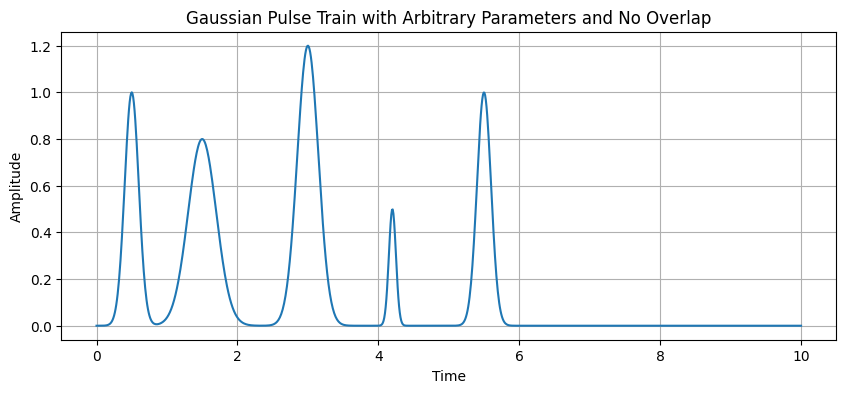

In [4]:
# Define parameters
centers = [0.5, 1.5, 3.0, 4.2, 5.5]  # List of arbitrary centers for the pulses
widths = [0.1, 0.2, 0.15, 0.05, 0.1]  # List of arbitrary widths for the pulses
amplitudes = [1.0, 0.8, 1.2, 0.5, 1.0]  # List of arbitrary amplitudes for the pulses
t = np.linspace(0, 10, 1000)  # Time array

# Generate the pulse train with arbitrary parameters and no overlap
train = pulse_train_no_overlap(t, centers, widths, amplitudes)

# Plot the pulse train
plt.figure(figsize=(10, 4))
plt.plot(t, train)
plt.title('Gaussian Pulse Train with Arbitrary Parameters and No Overlap')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

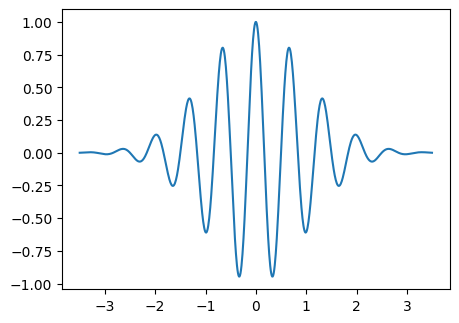

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
sigma = 1.0  # Standard deviation of the Gaussian pulse
omega = 2 * np.pi * 1.5  # Angular frequency of the cosine signal (e.g., 5 Hz)

# Time and frequency domain
t = np.linspace(-5 * sigma, 5 * sigma, 1000)
f = np.linspace(-10, 10, 1000)

# Gaussian pulse in time domain
s_t = np.exp(-t**2 / (2 * sigma**2))

# Modulated signal
x_t = s_t * np.cos(omega * t)

# Fourier transform of the Gaussian pulse
S_f = np.sqrt(2 * np.pi * sigma**2) * np.exp(-2 * np.pi**2 * sigma**2 * f**2)

# Fourier transform of the modulated signal
X_f = 0.5 * np.sqrt(2 * np.pi * sigma**2) * (
    np.exp(-2 * np.pi**2 * sigma**2 * (f - omega / (2 * np.pi))**2) +
    np.exp(-2 * np.pi**2 * sigma**2 * (f + omega / (2 * np.pi))**2)
)

# Plotting the results
plt.figure(figsize=(5, 8))

# Time domain plot
plt.subplot(2, 1, 1)
plt.plot(t[150:-150], x_t[150:-150], label='Modulated Gaussian Pulse')
# plt.xlim([-3.5, 3.5])
plt.savefig('pulse.eps', format='eps')

In [26]:
t.shape

(1000,)